## Create features for items from two artificial classes

In [1]:
X_C1 = rand(100,2);
X_C2 = bsxfun(@plus,rand(100,2),[0.2 1.2]);

X = [X_C1;X_C2];

Y = ones(200,1);
Y(1:100) = -1;
%Y = diag(Y);

## Plot the data

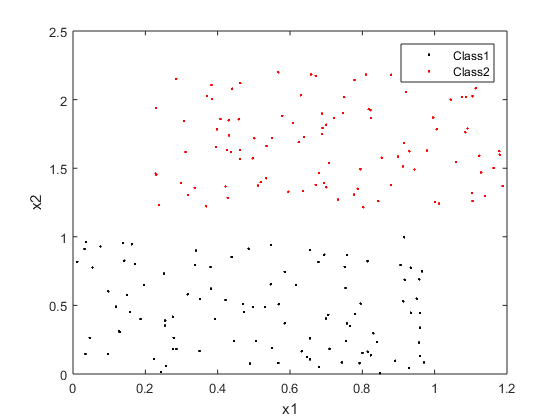

In [2]:
figure,
plot(X_C1(:,1),X_C1(:,2),'k.'), xlabel('x1'), ylabel('x2')
hold on
plot(X_C2(:,1),X_C2(:,2),'r.')
hold off
legend('Class1','Class2')

## Formulate the necessary matrices for optimization function

In [3]:
H = zeros(3);
H(1:2,1:2) = eye(2);
f = zeros(3,1);
A = -diag(Y)*[X ones(200,1)];
b = -ones(200,1);

## Run the optimization function

In [4]:
opt = optimoptions('quadprog','Display','off');
wb = quadprog(H,f,A,b,[],[],[],[],[],opt);

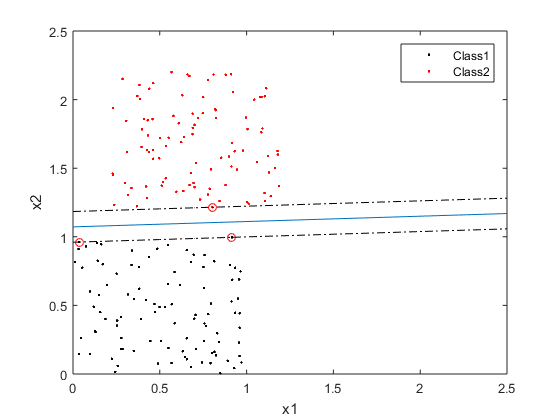

In [6]:
figure,
plot(X_C1(:,1),X_C1(:,2),'k.'), xlabel('x1'), ylabel('x2')
hold on
plot(X_C2(:,1),X_C2(:,2),'r.')
legend('Class1','Class2')

% svm separating hyperplane
x1 = 0:0.1:2.5;
x2 = (-wb(1)*x1-repmat(wb(3),size(x1,1),size(x1,2)))./wb(2);
plot(x1,x2)

% margin
marg_up =  (1-wb(1)*x1-repmat(wb(3),size(x1,1),size(x1,2)))./wb(2);
marg_down =  (-1-wb(1)*x1-repmat(wb(3),size(x1,1),size(x1,2)))./wb(2);
plot(x1,marg_up,'k-.')
plot(x1,marg_down,'k-.')

% find the support vectors
D = abs([X ones(200,1)]*wb);
sv = find(abs(D-1)<0.0001);
for s=1:length(sv)
    plot(X(sv(s),1),X(sv(s),2),'ro')
end
hold off